# Titanic - Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
len(data['Ticket'].unique())

681

In [7]:
data.duplicated(subset=['Ticket']).sum()

210

In [8]:
data['Ticket'].value_counts().sort_values(ascending=False)

347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
2683                1
SOTON/O2 3101287    1
11774               1
392092              1
370376              1
Name: Ticket, Length: 681, dtype: int64

In [9]:
data.Survived.sum()

342

In [10]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
data[data.Pclass==1]['Survived'].sum()

136

## Pre-processing

In [12]:
df=data.copy()

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

### Missing Values

In [16]:
df=df.drop('Cabin',axis=1)

In [17]:
df=df.dropna(subset='Embarked')

In [18]:
df_res=df[df['Age'].notna()]

<AxesSubplot:xlabel='Age', ylabel='Count'>

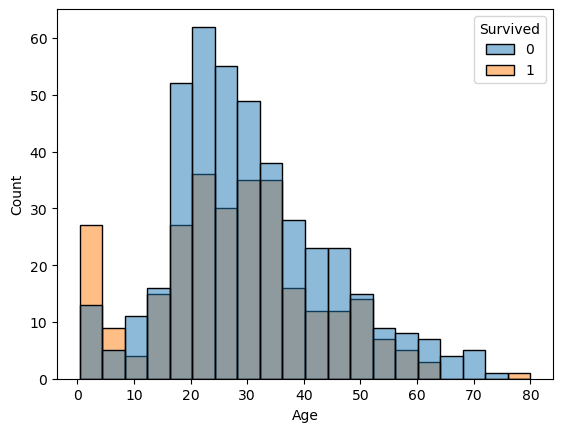

In [19]:
sns.histplot(df_res, x='Age',hue='Survived')

People with age betwen 0 and 10 and above 75 have better chance of surviving. It seems that age dosn't have a weight in the outcome for median ages, so I'm gonna fill NaNs with the median. 

In [20]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [21]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
df.shape

(889, 8)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Exploration

<AxesSubplot:>

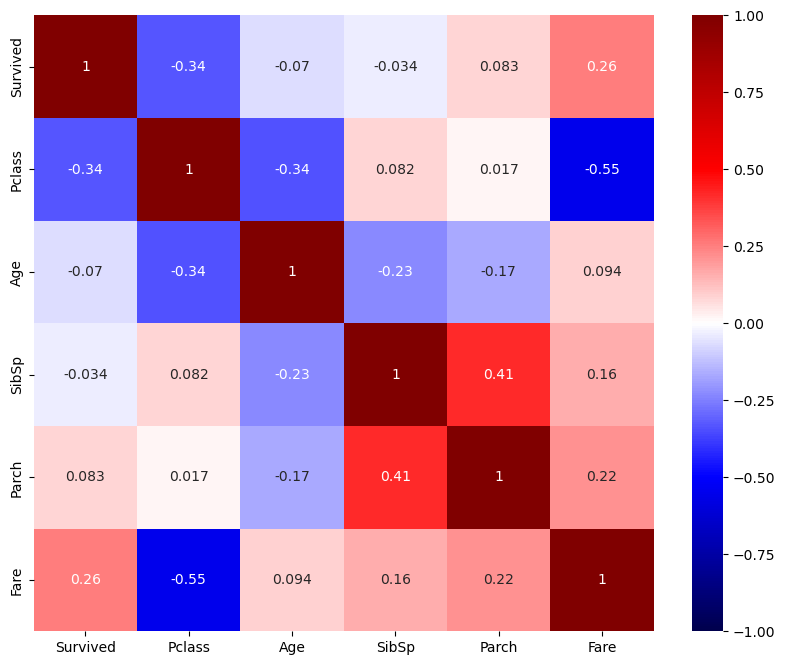

In [24]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1,cmap='seismic')

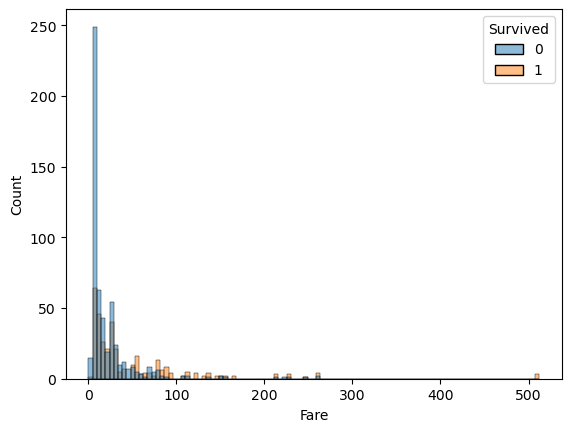

In [25]:
sns.histplot(data=df,x=df.Fare,hue='Survived')
plt.show()

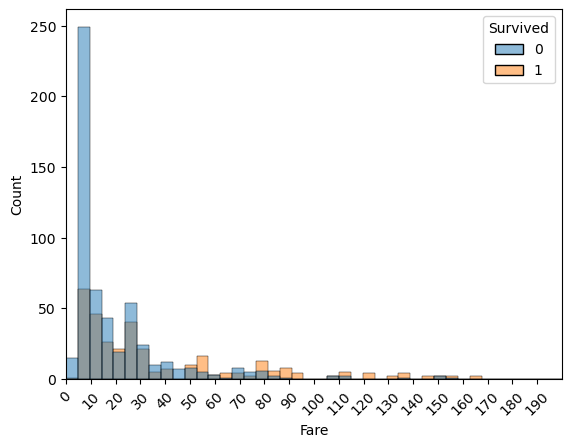

In [26]:
sns.histplot(data=df,x=df.Fare,hue='Survived').set(xticks=np.arange(200,step=10))
plt.xlim(0,200)
plt.xticks(rotation=45)
plt.show()

In [27]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The data is positively skewed.

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

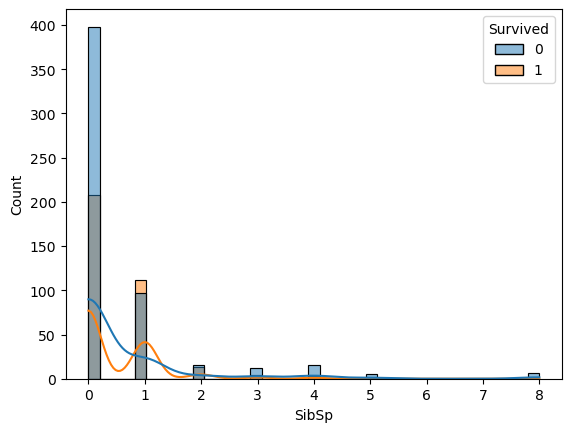

In [28]:
sns.histplot(data=df,x=df.SibSp, hue='Survived', kde=True
               )

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

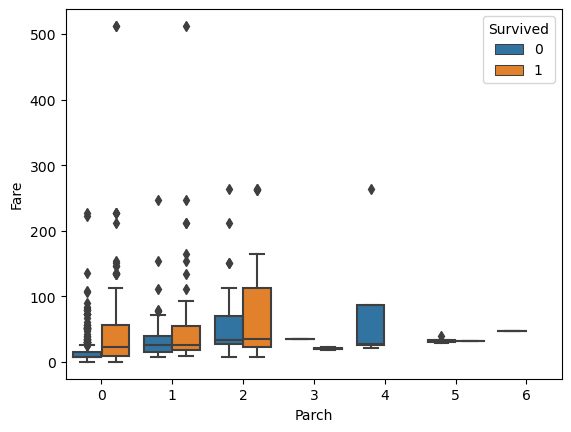

In [29]:
sns.boxplot(data=df,x=df.Parch,y=df.Fare, hue='Survived'
               )

In [30]:
df['family']=df.Parch+df.SibSp

In [31]:
df.groupby('family')['Fare'].mean()

family
0     21.023035
1     49.894129
2     39.692482
3     54.864510
4     58.094453
5     73.722727
6     29.366667
7     46.900000
10    69.550000
Name: Fare, dtype: float64

<AxesSubplot:xlabel='family', ylabel='Fare'>

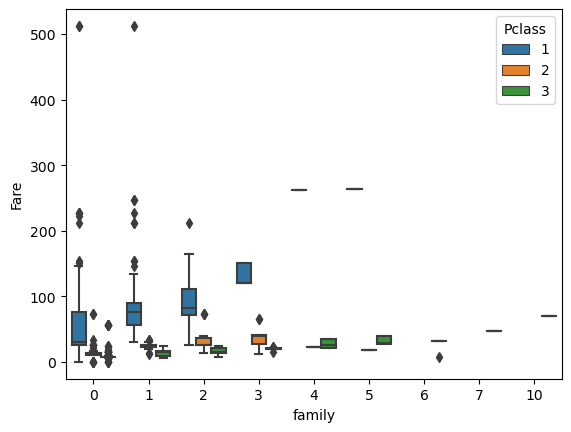

In [32]:
sns.boxplot(data=df,x=df.family,y=df.Fare,hue='Pclass'
               )

The greater the family, the greater the fare. So, I high fare doesn't necessarily mean that the person is richer. I believe it's useful to use the feature fare/family for training the model.

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


## Transformations

### New features

In [34]:
df.family=df.Parch+df.SibSp+1

In [35]:
df['fare_per_family']=df['Fare']/df['family']

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,fare_per_family
0,0,3,male,22.0,1,0,7.2500,S,2,3.62500
1,1,1,female,38.0,1,0,71.2833,C,2,35.64165
2,1,3,female,26.0,0,0,7.9250,S,1,7.92500
3,1,1,female,35.0,1,0,53.1000,S,2,26.55000
4,0,3,male,35.0,0,0,8.0500,S,1,8.05000


<AxesSubplot:xlabel='fare_per_family', ylabel='Count'>

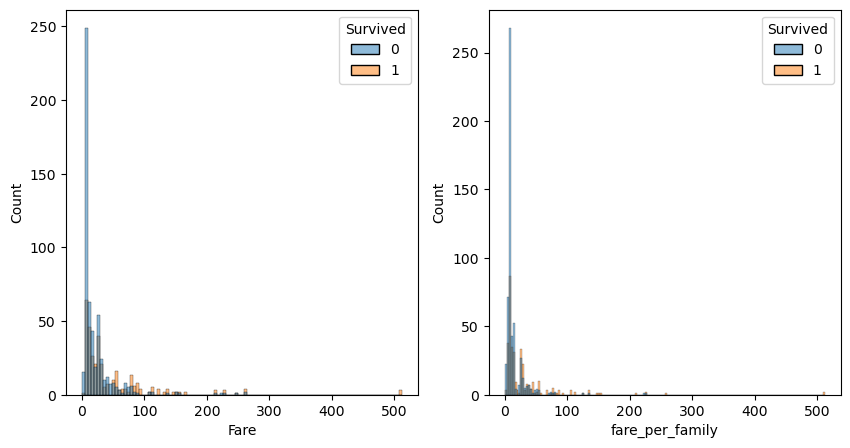

In [37]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=df,x=df.Fare,ax=ax[0],hue='Survived')
sns.histplot(data=df,x=df.fare_per_family,ax=ax[1],hue='Survived')

In [38]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,family,fare_per_family
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,1.906637,19.781204
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,1.614703,35.767862
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000,7.250000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,8.158300
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,22.525000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,512.329200


<AxesSubplot:xlabel='fare_per_family', ylabel='Survived'>

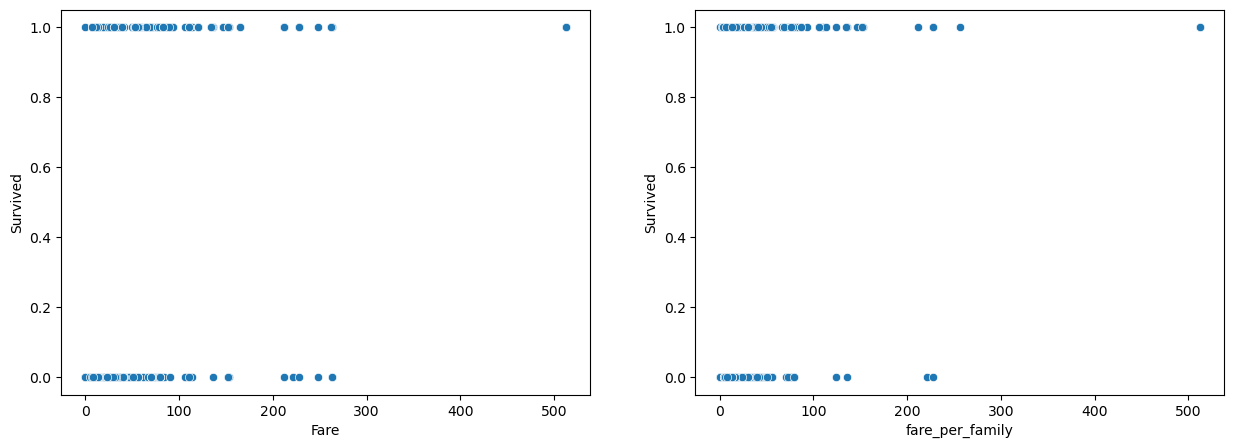

In [39]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=df,x=df.Fare,y=df.Survived, ax=ax[0])
sns.scatterplot(data=df,x=df.fare_per_family,y=df.Survived, ax=ax[1])

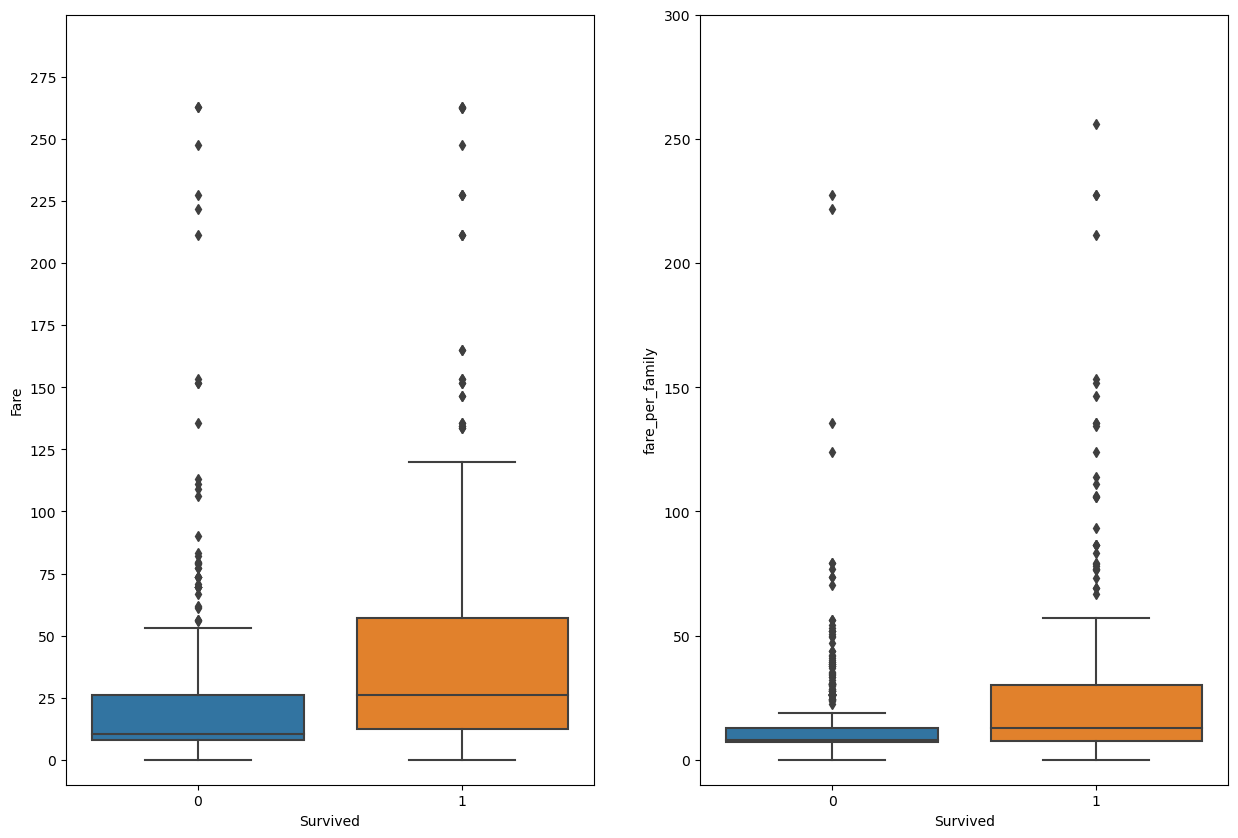

In [40]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
sns.boxplot(data=df,x=df.Survived,y=df.Fare, ax=ax[0])
sns.boxplot(data=df,x=df.Survived,y=df.fare_per_family, ax=ax[1])
ax[0].set_ylim(-10,300)
ax[1].set_ylim(-10,300)
ax[0].set_yticks(ticks=np.arange(300,step=25))   
plt.show()

<AxesSubplot:>

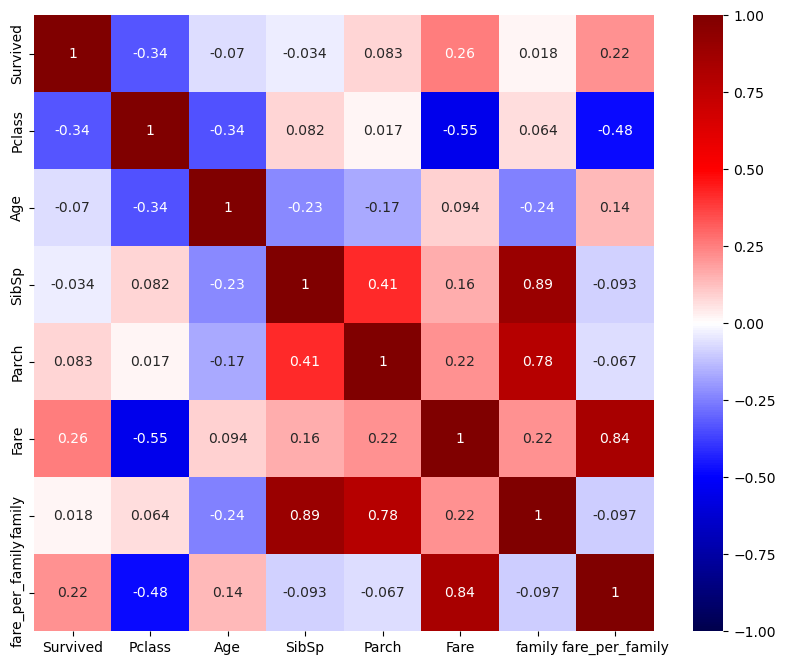

In [41]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1,cmap='seismic')

The feature "family" has a low correlation with the target, so I'm gonna drop it.
The feature "family_per_family", tho, is a good candidate to a feature that might help the model predict the target outcome.  

In [42]:
df=df.drop(['family','SibSp'],axis=1)

In [43]:
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,fare_per_family
0,0,3,male,22.0,0,7.2500,S,3.62500
1,1,1,female,38.0,0,71.2833,C,35.64165
2,1,3,female,26.0,0,7.9250,S,7.92500
3,1,1,female,35.0,0,53.1000,S,26.55000
4,0,3,male,35.0,0,8.0500,S,8.05000


### Binning numerical data into categorical data

In [44]:
bins_age=[0,10,20,60,np.inf]

In [45]:
df.Age=pd.cut(df.Age,bins_age,labels=['child','teen','adult','senior'])

In [46]:
age_counts=df.Age.value_counts(normalize=False).sort_index()

In [47]:
age_counts

child      64
teen      115
adult     689
senior     21
Name: Age, dtype: int64

In [48]:
df.groupby('Age')['Fare'].median()

Age
child     27.0000
teen      10.1708
adult     13.5000
senior    26.5500
Name: Fare, dtype: float64

In [49]:
df.groupby('Age')['fare_per_family'].median()

Age
child      5.714583
teen       8.050000
adult      8.683300
senior    26.550000
Name: fare_per_family, dtype: float64

In [50]:
survival_rate_age=df.groupby('Age')['Survived'].sum()

In [51]:
survival_rate_age

Age
child      38
teen       44
adult     254
senior      4
Name: Survived, dtype: int64

In [52]:
for i in range(3):
    survival_rate_age.iloc[i]=survival_rate_age.iloc[i]/age_counts.iloc[i]
    

In [53]:
survival_rate_age

Age
child     0.593750
teen      0.382609
adult     0.368650
senior    4.000000
Name: Survived, dtype: float64

Children had a higher percentage of surviving! It might be a random noise due to the short amount of data, but it's good to keep that in mind.

In [54]:
df[(df.Age=='child')&(df.Survived)]['Pclass'].value_counts()

3    19
2    17
1     2
Name: Pclass, dtype: int64

### One Hot Encoding

In [55]:
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,fare_per_family
0,0,3,male,adult,0,7.2500,S,3.62500
1,1,1,female,adult,0,71.2833,C,35.64165
2,1,3,female,adult,0,7.9250,S,7.92500
3,1,1,female,adult,0,53.1000,S,26.55000
4,0,3,male,adult,0,8.0500,S,8.05000


In [56]:
df=pd.concat([df,pd.get_dummies(df.Sex,prefix='sex')],axis=1).drop('Sex',axis=1)

In [57]:
df=pd.concat([df,pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1).drop('Embarked',axis=1)

In [58]:
df=pd.concat([df,pd.get_dummies(df.Age,prefix='Age')],axis=1).drop('Age',axis=1)

In [59]:
df.head()

,Survived,Pclass,Parch,Fare,fare_per_family,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_child,Age_teen,Age_adult,Age_senior
0,0,3,0,7.2500,3.62500,0,1,0,0,1,0,0,1,0
1,1,1,0,71.2833,35.64165,1,0,1,0,0,0,0,1,0
2,1,3,0,7.9250,7.92500,1,0,0,0,1,0,0,1,0
3,1,1,0,53.1000,26.55000,1,0,0,0,1,0,0,1,0
4,0,3,0,8.0500,8.05000,0,1,0,0,1,0,0,1,0


### Scaling 

I'm gonna test three different scaling methods.

#### MinMaxScaler

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_norm=df.copy()
df_norm['Fare']=scaler.fit_transform(df_norm[['Fare']])
df_norm['fare_per_family']=scaler.fit_transform(df_norm[['fare_per_family']])

In [61]:
df_norm.head()

,Survived,Pclass,Parch,Fare,fare_per_family,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_child,Age_teen,Age_adult,Age_senior
0,0,3,0,0.014151,0.007076,0,1,0,0,1,0,0,1,0
1,1,1,0,0.139136,0.069568,1,0,1,0,0,0,0,1,0
2,1,3,0,0.015469,0.015469,1,0,0,0,1,0,0,1,0
3,1,1,0,0.103644,0.051822,1,0,0,0,1,0,0,1,0
4,0,3,0,0.015713,0.015713,0,1,0,0,1,0,0,1,0


<AxesSubplot:xlabel='Fare', ylabel='Count'>

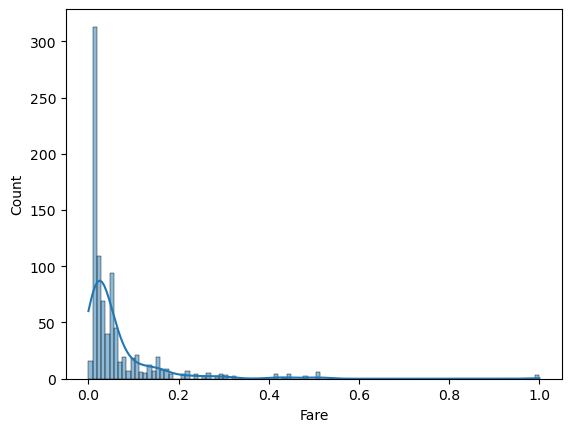

In [62]:
sns.histplot(data=df_norm,x=df_norm.Fare,kde=True)

<AxesSubplot:xlabel='fare_per_family', ylabel='Count'>

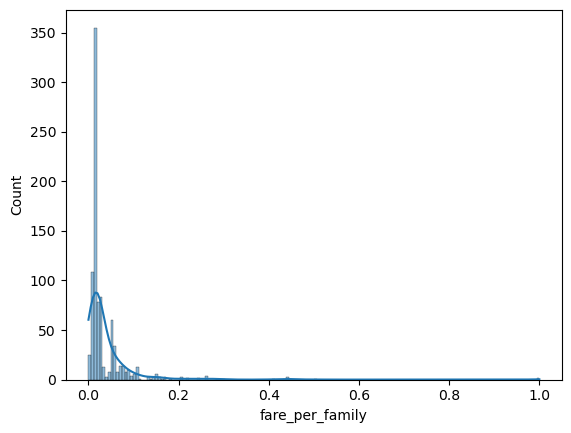

In [63]:
sns.histplot(data=df_norm,x=df_norm.fare_per_family,kde=True)

The data is still skewed. 

#### LogTransformation

It is especially useful for positively skewed data.

In [64]:
from sklearn.preprocessing import FunctionTransformer
scaler = FunctionTransformer(np.log1p)
df_log=df.copy()
df_log['Fare']=scaler.fit_transform(df_log[['Fare']])
df_log['fare_per_family']=scaler.fit_transform(df_log[['fare_per_family']])

In [65]:
df_log.head()

,Survived,Pclass,Parch,Fare,fare_per_family,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_child,Age_teen,Age_adult,Age_senior
0,0,3,0,2.110213,1.531476,0,1,0,0,1,0,0,1,0
1,1,1,0,4.280593,3.601186,1,0,1,0,0,0,0,1,0
2,1,3,0,2.188856,2.188856,1,0,0,0,1,0,0,1,0
3,1,1,0,3.990834,3.316003,1,0,0,0,1,0,0,1,0
4,0,3,0,2.202765,2.202765,0,1,0,0,1,0,0,1,0


<AxesSubplot:xlabel='Fare', ylabel='Count'>

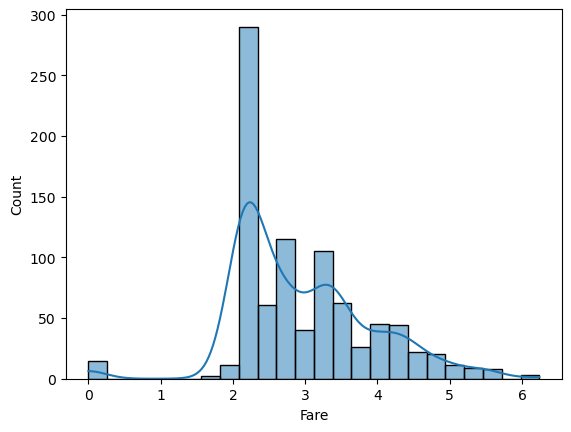

In [66]:
sns.histplot(data=df_log,x=df_log.Fare,kde=True)

<AxesSubplot:xlabel='fare_per_family', ylabel='Count'>

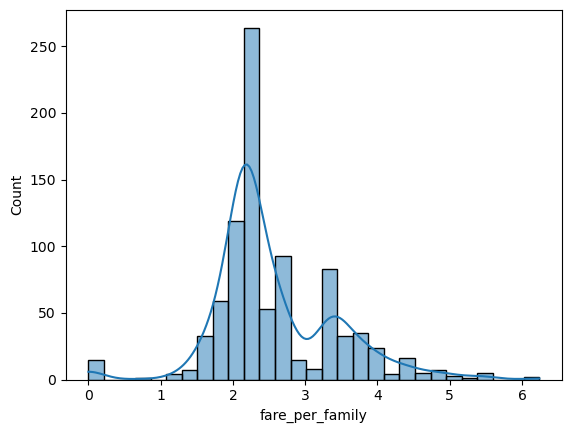

In [67]:
sns.histplot(data=df_log,x=df_log.fare_per_family,kde=True)

Here the distribution is less skewed. So I'm gonna choose LogTransformation as the scaling method. 

#### Standardization

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std=df.copy()
df_std['Fare']=scaler.fit_transform(df_std[['Fare']])
df_std['fare_per_family']=scaler.fit_transform(df_std[['fare_per_family']])

In [69]:
df_std.head()

,Survived,Pclass,Parch,Fare,fare_per_family,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_child,Age_teen,Age_adult,Age_senior
0,0,3,0,-0.500240,-0.451950,0,1,0,0,1,0,0,1,0
1,1,1,0,0.788947,0.443677,1,0,1,0,0,0,0,1,0
2,1,3,0,-0.486650,-0.331663,1,0,0,0,1,0,0,1,0
3,1,1,0,0.422861,0.189349,1,0,0,0,1,0,0,1,0
4,0,3,0,-0.484133,-0.328166,0,1,0,0,1,0,0,1,0


<AxesSubplot:xlabel='Fare', ylabel='Count'>

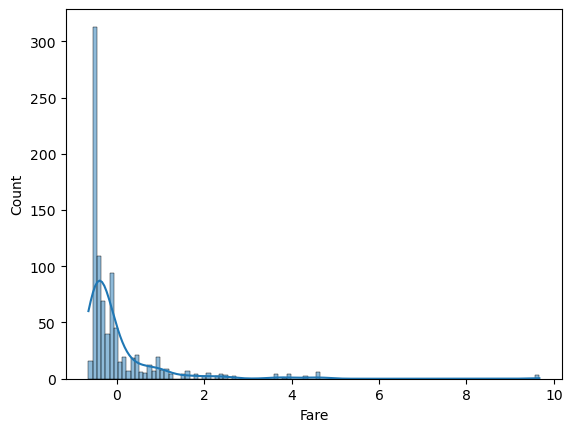

In [70]:
sns.histplot(data=df_std,x=df_std.Fare,kde=True)

<AxesSubplot:xlabel='fare_per_family', ylabel='Count'>

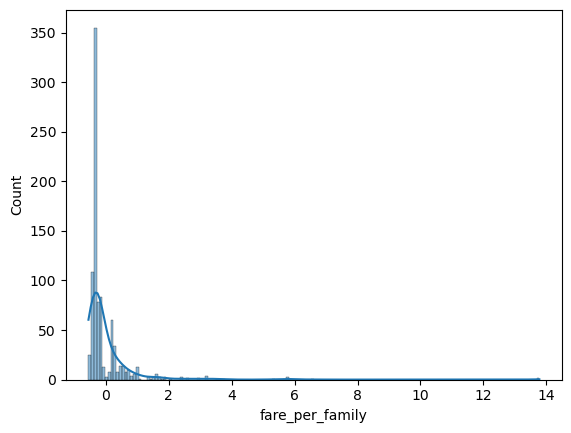

In [71]:
sns.histplot(data=df_std,x=df_std.fare_per_family,kde=True)

Still skewed.

The best option is LogTransformation.

## Test and train data

In [72]:
df_log.describe()

,Survived,Pclass,Parch,Fare,fare_per_family,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_child,Age_teen,Age_adult,Age_senior
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.382452,2.959024,2.560896,0.350956,0.649044,0.188976,0.086614,0.724409,0.071991,0.129359,0.775028,0.023622
std,0.486260,0.834700,0.806761,0.967750,0.854235,0.477538,0.477538,0.391710,0.281427,0.447063,0.258619,0.335786,0.417799,0.151954
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.185579,2.110213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,0.000000,2.737881,2.214661,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,0.000000,3.465736,3.158064,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,3.000000,6.000000,6.240917,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
x=df_log.drop('Survived',axis=1)

In [96]:
y=df_log[['Survived']].copy()

In [97]:
y=y.astype("category")
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [75]:
from sklearn.model_selection import train_test_split
train_ratio = 0.8
test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_ratio, test_size=test_ratio)

## Selecting a model

In [143]:
keepdims=False

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [78]:
from sklearn.svm import SVC
svm=SVC()

In [79]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier()

In [80]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [82]:
from sklearn.model_selection import cross_val_score

In [113]:
def test_model(model,model_name,x,y):
    scores = cross_val_score(model, x, y, scoring="accuracy", cv=10)
    print('Model: {}'.format(model_name))
    print("Mean Score:", scores.mean())
    print("Standard deviation:", scores.std())

In [145]:
test_model(knn,'KNN',x_train,y_train)

Model: KNN
Mean Score: 0.7974765258215963
Standard deviation: 0.04037835896423127


/home/r3maia/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/r3maia/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [115]:
test_model(knn,'KNN',x_test,y_test)

Model: KNN
Mean Score: 0.781372549019608
Standard deviation: 0.06702852581625299


/home/r3maia/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/r3maia/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [116]:
test_model(svm,'SVM',x_train,y_train)

Model: SVM
Mean Score: 0.7960876369327075
Standard deviation: 0.06104911304097886


In [117]:
test_model(svm,'SVM',x_test,y_test)

Model: SVM
Mean Score: 0.7977124183006536
Standard deviation: 0.06317340877482679


In [118]:
test_model(forest,'Random Forest',x_train,y_train)

Model: Random Forest
Mean Score: 0.8185641627543037
Standard deviation: 0.03956047682291494


In [120]:
test_model(forest,'Random Forest',x_test,y_test)

Model: Random Forest
Mean Score: 0.8035947712418301
Standard deviation: 0.0808247302497793


In [121]:
test_model(log_reg,'Logistic',x_train,y_train)

Model: Logistic
Mean Score: 0.7961071987480437
Standard deviation: 0.0593172852581928


In [122]:
test_model(log_reg,'Logistic',x_test,y_test)

Model: Logistic
Mean Score: 0.7807189542483661
Standard deviation: 0.09304777263211636


There isn't a significant difference among the models's accuracy, so I'll have to grid-search each of them. 

## Fine-tuning the model

In [123]:
from sklearn.model_selection import GridSearchCV

### Random Forest

In [124]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_search = GridSearchCV(forest, param_grid, cv=5,
scoring='accuracy',
return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [125]:
forest_final=grid_search.best_estimator_

In [127]:
test_model(forest_final,'Random Forest',x_train,y_train)

Model: Random Forest
Mean Score: 0.8339593114241002
Standard deviation: 0.04968768868217938


In [138]:
test_model(forest_final,'Random Forest',x_test,y_test)

Model: Random Forest
Mean Score: 0.7532679738562091
Standard deviation: 0.09665968413092119


### KNN

In [147]:
param_grid = [{'n_neighbors':[3,4,5,6,7,8,9,10,15,20,30],'weights':['uniform','distance'],
              'metric':['euclidean', 'manhattan', 'minkowski', 'chebyshev']}]
grid_search = GridSearchCV(knn, param_grid, cv=5,
scoring='accuracy',
return_train_score=True)
grid_search.fit(x_train, y_train)

/home/r3maia/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/r3maia/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'minkowski',
                                     'chebyshev'],
                          'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [149]:
knn_final=grid_search.best_estimator_

In [150]:
test_model(knn_final,'KNN',x_train,y_train)

Model: KNN
Mean Score: 0.7919014084507043
Standard deviation: 0.05270998568350975


/home/r3maia/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/r3maia/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [148]:
test_model(knn_final,'KNN',x_test,y_test)

Model: KNN
Mean Score: 0.7924836601307189
Standard deviation: 0.059978672502075954


/home/r3maia/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/r3maia/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

### SVM

In [152]:
param_grid = [{'C':[0.1,0.2,0.3,0.5,1,2,3,4,5,10,20,50,100],'kernel':['linear']},{'C':[0.1,0.2,0.3,0.5,1,2,3,4,5,10,20,50,100],
                                                             'kernel':['rbf', 'poly','sigmoid'],
                                                             'gamma':[0.1, 0.01, 0.001,0.0001]}]
grid_search = GridSearchCV(svm, param_grid, cv=5,
scoring='accuracy',
return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 4, 5, 10, 20, 50,
                                100],
                          'kernel': ['linear']},
                         {'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 4, 5, 10, 20, 50,
                                100],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'poly', 'sigmoid']}],
             return_train_score=True, scoring='accuracy')

In [155]:
svm_final=grid_search.best_estimator_

In [157]:
test_model(svm_final,'SVM',x_train,y_train)

Model: SVM
Mean Score: 0.8017018779342724
Standard deviation: 0.0451065133887476


In [158]:
test_model(svm_final,'SVM',x_test,y_test)

Model: SVM
Mean Score: 0.7754901960784313
Standard deviation: 0.0789613088216521


### Logistic Regression

In [167]:
param_grid = [{'penalty':['l2'],"C":[0.1,0.2,0.3,0.5,1,2,3,4,5,10,20,50,100]}]
grid_search = GridSearchCV(log_reg, param_grid, cv=5,
scoring='accuracy',
return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 4, 5, 10, 20, 50,
                                100],
                          'penalty': ['l2']}],
             return_train_score=True, scoring='accuracy')

In [168]:
log_reg_final=grid_search.best_estimator_

In [169]:
test_model(log_reg_final,'Log Reg',x_train,y_train)

Model: Log Reg
Mean Score: 0.7946987480438183
Standard deviation: 0.055863643658080074


In [170]:
test_model(log_reg_final,'Log Reg',x_test,y_test)

Model: Log Reg
Mean Score: 0.8140522875816993
Standard deviation: 0.10975187453071442


This was the best model. 

## Predicting outcome on new data

In [199]:
new_data=pd.read_csv('test.csv')

In [200]:
new_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [201]:
new_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [210]:
df2=new_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [211]:
df2['Age']=df2['Age'].fillna(value=df2.Age.median())

In [212]:
df2['Fare']=df2.Fare.fillna(value=df2.Fare.median())

In [213]:
df2['family']=df2.Parch+df2.SibSp+1

In [214]:
df2['fare_per_family']=df2['Fare']/df2['family']

In [215]:
df2=df2.drop(['family','SibSp'],axis=1)

In [216]:
df2.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,fare_per_family
0,3,male,34.5,0,7.8292,Q,7.829200
1,3,female,47.0,0,7.0000,S,3.500000
2,2,male,62.0,0,9.6875,Q,9.687500
3,3,male,27.0,0,8.6625,S,8.662500
4,3,female,22.0,1,12.2875,S,4.095833


In [217]:
df2['Age']=pd.cut(df2.Age,bins_age,labels=['child','teen','adult','senior'])

In [218]:
df2=pd.concat([df2,pd.get_dummies(df2.Sex,prefix='sex')],axis=1).drop('Sex',axis=1)

In [219]:
df2=pd.concat([df2,pd.get_dummies(df2.Embarked,prefix='Embarked')],axis=1).drop('Embarked',axis=1)

In [220]:
df2=pd.concat([df2,pd.get_dummies(df2.Age,prefix='Age')],axis=1).drop('Age',axis=1)

In [221]:
df2.head()

,Pclass,Parch,Fare,fare_per_family,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_child,Age_teen,Age_adult,Age_senior
0,3,0,7.8292,7.829200,0,1,0,1,0,0,0,1,0
1,3,0,7.0000,3.500000,1,0,0,0,1,0,0,1,0
2,2,0,9.6875,9.687500,0,1,0,1,0,0,0,0,1
3,3,0,8.6625,8.662500,0,1,0,0,1,0,0,1,0
4,3,1,12.2875,4.095833,1,0,0,0,1,0,0,1,0


In [222]:
scaler2 = FunctionTransformer(np.log1p)
df2_log=df2.copy()
df2_log['Fare']=scaler2.fit_transform(df2_log[['Fare']])
df2_log['fare_per_family']=scaler2.fit_transform(df2_log[['fare_per_family']])

In [223]:
df2_log.head()

,Pclass,Parch,Fare,fare_per_family,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_child,Age_teen,Age_adult,Age_senior
0,3,0,2.178064,2.178064,0,1,0,1,0,0,0,1,0
1,3,0,2.079442,1.504077,1,0,0,0,1,0,0,1,0
2,2,0,2.369075,2.369075,0,1,0,1,0,0,0,0,1
3,3,0,2.268252,2.268252,0,1,0,0,1,0,0,1,0
4,3,1,2.586824,1.628423,1,0,0,0,1,0,0,1,0


In [225]:
df2_log.isna().sum()

Pclass             0
Parch              0
Fare               0
fare_per_family    0
sex_female         0
sex_male           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Age_child          0
Age_teen           0
Age_adult          0
Age_senior         0
dtype: int64

In [227]:
y_hat=pd.DataFrame(log_reg_final.predict(df2_log))

In [236]:
answer=new_data[['PassengerId']].copy()

In [237]:
answer['Survived']=y_hat.copy()

In [239]:
answer.sample(10)

,PassengerId,Survived
401,1293,0
131,1023,0
392,1284,0
397,1289,1
214,1106,0
107,999,0
391,1283,1
124,1016,0
114,1006,1
255,1147,0


In [241]:
answer.shape

(418, 2)

In [242]:
answer.to_csv('answer.csv')

In [243]:
answer2=answer.set_index('PassengerId')

In [245]:
answer2.to_csv('answer2.csv')